# Statistical task

### Identify top three chemical feature (attribute) that have greatest impact on wine quality.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the wine quality dataset
wine_df = pd.read_csv('WineQT.csv')

# Display basic information about the dataset
print("Dataset shape:", wine_df.shape)
print("\nFirst few rows:")
print(wine_df.head())

Dataset shape: (1143, 13)

First few rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4       

## Statistical task

### 1. Calculating the relationships between variables in the dataset and visualizing them with a heatmap.

In [19]:
# Calculate correlation between all features and quality
# Exclude 'Id' column as it's just an identifier
features = wine_df.drop(['Id', 'quality'], axis=1).columns
correlations = wine_df[list(features) + ['quality']].corr()['quality'].drop('quality')

# Sort by absolute correlation values to find strongest relationships
correlations_sorted = correlations.abs().sort_values(ascending=False)

print("Correlation of each feature with wine quality:")
for feature, corr in correlations_sorted.items():
    actual_corr = correlations[feature]
    print(f"{feature:30s}: {actual_corr:7.4f} (|corr| = {corr:.4f})")

print("\n TOP 3 FEATURES WITH GREATEST IMPACT ON WINE QUALITY:")
top_3_features = correlations_sorted.head(3)
for i, (feature, abs_corr) in enumerate(top_3_features.items(), 1):
    actual_corr = correlations[feature]
    print(f"{i}. {feature:25s}: correlation = {actual_corr:7.4f}")

Correlation of each feature with wine quality:
alcohol                       :  0.4849 (|corr| = 0.4849)
volatile acidity              : -0.4074 (|corr| = 0.4074)
sulphates                     :  0.2577 (|corr| = 0.2577)
citric acid                   :  0.2408 (|corr| = 0.2408)
total sulfur dioxide          : -0.1833 (|corr| = 0.1833)
density                       : -0.1752 (|corr| = 0.1752)
chlorides                     : -0.1241 (|corr| = 0.1241)
fixed acidity                 :  0.1220 (|corr| = 0.1220)
free sulfur dioxide           : -0.0633 (|corr| = 0.0633)
pH                            : -0.0525 (|corr| = 0.0525)
residual sugar                :  0.0220 (|corr| = 0.0220)

 TOP 3 FEATURES WITH GREATEST IMPACT ON WINE QUALITY:
1. alcohol                  : correlation =  0.4849
2. volatile acidity         : correlation = -0.4074
3. sulphates                : correlation =  0.2577


## Correlation Heatmap Analysis

The heatmap below visualizes the correlation matrix between all chemical features and wine quality. This provides a comprehensive view of how different features relate to each other and to the quality rating.

**Purpose:**
- Identify which features have the strongest relationships with wine quality
- Understand multicollinearity between features (how features relate to each other)
- Guide feature selection for predictive modeling


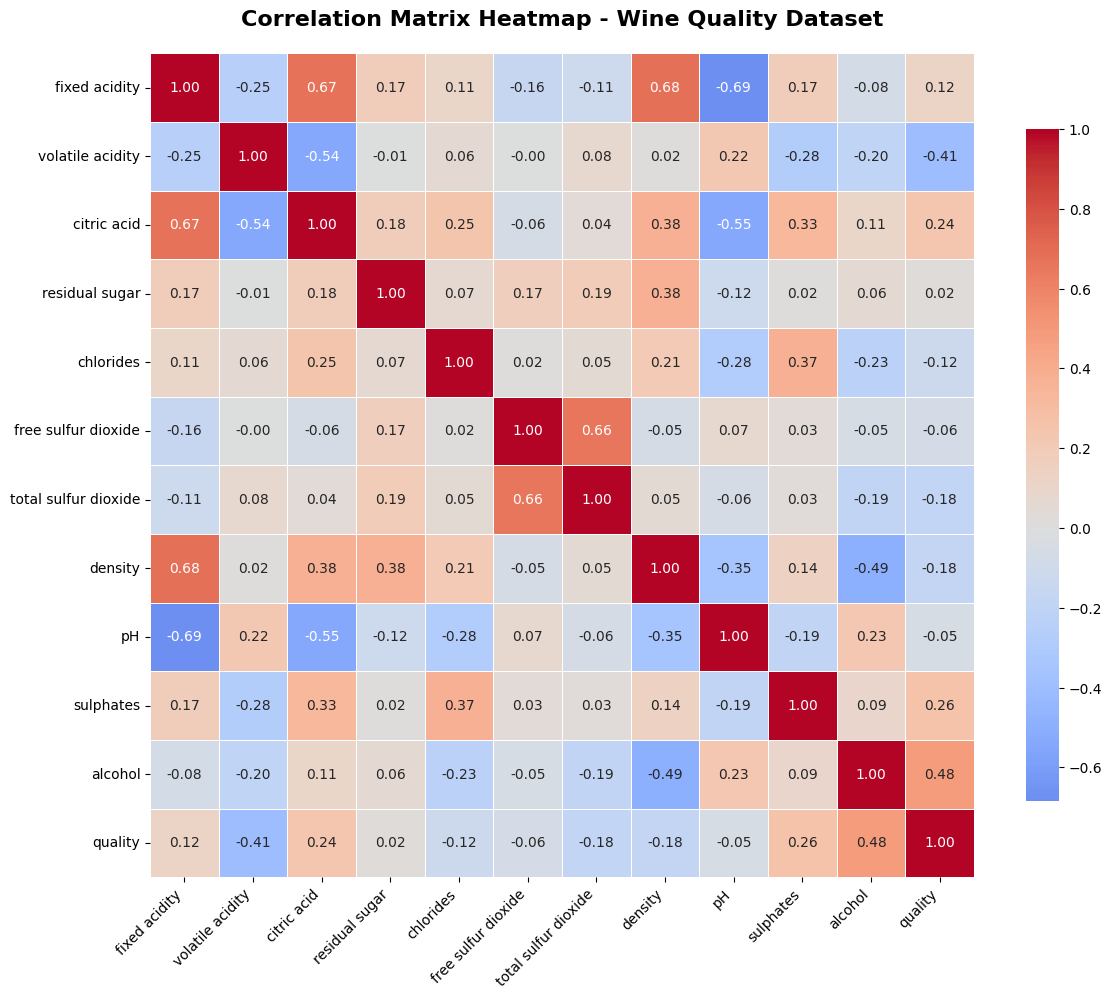

In [20]:
# Create correlation matrix heatmap
# Exclude 'Id' column as it's just an identifier
correlation_matrix = wine_df.drop('Id', axis=1).corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,  
            fmt='.2f',   
            cmap='coolwarm',  
            center=0,    
            square=True, 
            linewidths=0.5,  
            cbar_kws={"shrink": 0.8})  

plt.title('Correlation Matrix Heatmap - Wine Quality Dataset', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Key Takeaways from the Correlation Heatmap:

1. **Primary Quality Indicators:**
   - **Alcohol** (0.48) shows the strongest positive correlation with quality - wines with higher alcohol content tend to be rated higher
   - **Volatile acidity** (-0.41) shows the strongest negative correlation - higher volatile acidity significantly reduces wine quality
   - **Sulphates** (0.26) is the third most important feature, with a moderate positive correlation

2. **Feature Interactions:**
   - **Fixed acidity and citric acid** are highly correlated (0.67), suggesting they measure related chemical properties
   - **Density and fixed acidity** show strong positive correlation (0.67), indicating heavier wines tend to have higher acidity
   - **Alcohol and density** are negatively correlated (-0.50), meaning higher alcohol content corresponds to lower density

3. **Weak Predictors:**
   - Features like **pH** (-0.05), **residual sugar** (0.02), and **free sulfur dioxide** (-0.06) show very weak correlations with quality, suggesting they have minimal direct impact on wine ratings

4. **Model Building Insight:**
   - The moderate correlation values (highest is 0.48) suggest that wine quality is influenced by multiple factors working together
   - Feature engineering or non-linear models may be needed to capture complex interactions between chemical properties
